In [1]:
import MDAnalysis as mda

# Create Universe

To create our universe we need to provide topology file. trajectory file is optional.

In [2]:
universe = mda.Universe("top.pdb", "A1SLCD.dcd")
print(universe)

<Universe with 131 atoms>


/home/sujaly/anaconda3/envs/calvados/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
our_atoms = universe.atoms
print(type(our_atoms))
our_atoms.names # type: ignore

<class 'MDAnalysis.core.groups.AtomGroup'>


array(['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA',
       'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA'],
      dtype=object)

In [4]:
import nglview as nv

view_universe = nv.show_mdanalysis(universe)

view_universe

NGLWidget(max_frame=2019)

In [6]:
#first 20 atoms

first_twenty = universe.atoms[0:20]
print(first_twenty.names)

['CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA' 'CA'
 'CA' 'CA' 'CA' 'CA' 'CA' 'CA']


In [9]:
view_first_twenty = nv.show_mdanalysis(first_twenty)
view_first_twenty

NGLWidget(max_frame=2019)

In [10]:
protein = universe.select_atoms('protein')
view_protein = nv.show_mdanalysis(protein)
view_protein

NGLWidget(max_frame=2019)

In [11]:
pos = our_atoms.positions
pos

array([[240.02563, 238.73515, 242.53734],
       [238.1436 , 236.04578, 244.43999],
       [238.38557, 235.66667, 248.24374],
       [238.64656, 237.57379, 251.49   ],
       [239.36119, 237.24513, 255.20946],
       [238.65804, 238.8261 , 258.5954 ],
       [237.98051, 242.57845, 258.51224],
       [238.9792 , 242.92978, 254.91025],
       [238.41782, 243.26852, 251.12755],
       [238.79582, 242.03383, 247.55775],
       [235.4974 , 241.61647, 245.68741],
       [236.91455, 242.64851, 242.30132],
       [238.3638 , 245.92361, 241.05406],
       [237.46675, 247.59512, 244.33395],
       [236.25414, 247.22818, 247.88376],
       [235.3065 , 248.22824, 251.41948],
       [237.46535, 247.72995, 254.51418],
       [236.94382, 248.52263, 258.1995 ],
       [235.4027 , 251.95644, 257.8398 ],
       [236.33014, 252.45726, 254.21927],
       [238.95363, 252.33116, 251.49188],
       [238.00487, 252.03152, 247.80139],
       [234.85901, 252.90721, 245.82239],
       [236.53215, 253.28925, 242.

# Built-in Analyses

In [13]:
from MDAnalysis.analysis.rms import RMSD
import matplotlib.pyplot as plt

In [15]:
c_alphas = universe.select_atoms('name CA')

rmsd_cal = RMSD(c_alphas, c_alphas)
rmsd_cal.run()

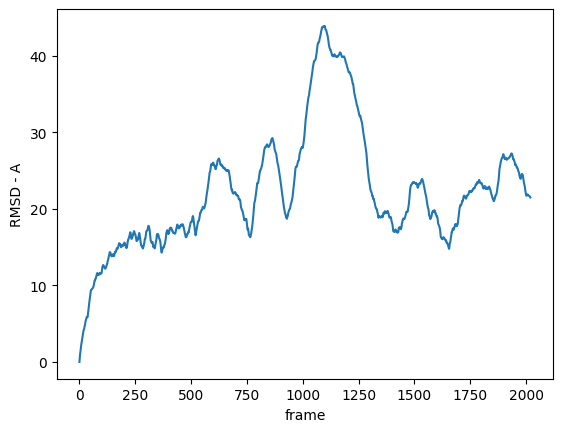

In [17]:
plt.plot(rmsd_cal.results.rmsd.T[0], rmsd_cal.results.rmsd.T[2])
plt.xlabel('frame')
plt.ylabel('RMSD - A')
plt.show()